# Colloid Output Utilities

The colloid output utilities module `ColloidOutput` contains a number of classes to read in and process LB-Colloid model data and D2Q9 lattice Boltzmann output data.

It is a powerful set of utilities that could be extended to do many more things. Let's take a look at the module

First, we are going to set up our environemnt

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from lb_colloids import ColloidOutput

workspace = os.path.join("..", "data")

Now let's set our `endpoint` and `hdf5` variables to a set of outputs for LB-Colloids. The endpoint file contains information about the breakthrough of colloids, and the hdf5 file contains outputs from lattice Boltzmann, physical force arrays from `ColloidModel` and parameterization information

In [2]:
endpoint = os.path.join(workspace, "s5_prerun.endpoint")
hdf5 = os.path.join(workspace, "s5_prerun.hdf5")

We can load the endpoint file into memory by using the `ASCIIReader` class; this loads the data into a pandas dataframe

In [3]:
enp = ColloidOutput.ASCIIReader(endpoint)
enp.df

,flag,nts,x-position,y-position,x-model,y-model,start-ts,end-ts,delta-ts
colloid,,,,,,,,,
1788,3,2500,0.000078,NaN,782.76507,NaN,1,2478,2477
1568,3,2500,0.000078,NaN,784.09285,NaN,1,2498,2497
1530,3,2500,0.000078,NaN,783.28989,NaN,1,2493,2492
1052,3,2500,0.000078,NaN,782.95360,NaN,1,2489,2488
1040,3,2500,0.000078,NaN,781.30392,NaN,1,2485,2484
977,3,2500,0.000079,NaN,785.93185,NaN,1,2493,2492
946,3,2500,0.000079,NaN,785.37382,NaN,1,2489,2488
862,3,2500,0.000078,NaN,783.47290,NaN,1,2496,2495
768,3,2500,0.000078,NaN,783.08338,NaN,1,2488,2487


We can also load the hdf5 file using the `Hdf5Reader` class. By calling `keys` we can see what output data is stored in the hdf5 file

In [4]:
hdf = ColloidOutput.Hdf5Reader(hdf5)
hdf.keys

['ac',
 'reynolds_number',
 'lewis_x',
 'dlvo_x',
 'distance_fine_x',
 'lb_velocity_x',
 'lb_velocity_y',
 'image',
 'brownian_x',
 'lb_mean_velocity_y',
 'lb_mean_velocity_x',
 'edl_fine',
 'attractive_x',
 'attractive_y',
 'edl_y',
 'edl_x',
 'velocity_x',
 'velocity_y',
 'col_col_y',
 'col_col_x',
 'lewis_y',
 'dlvo_y',
 'lvdw_x',
 'distance_x',
 'distance_y',
 'lvdw_y',
 'distance_fine_y',
 'bouyancy',
 'pore_diameter',
 'distance_array',
 'col_col_fine_x',
 'brownian_y',
 'col_col_fine',
 'gravity',
 'dlvo_fine',
 'conversion_factor',
 'col_col',
 'distance_fine',
 'col_col_fine_y',
 'ionic',
 'porosity',
 'attractive_fine']

If we want to get data from the hdf5 file, we can provide the `get_data()` method a key.

Here we look at the variability in Brownian motion (for one timestep) in the y-direction

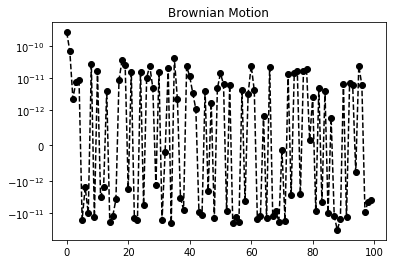

In [5]:
br = hdf.get_data("brownian_y")
plt.plot(np.arange(0, br.size), br[0], "ko--")
plt.yscale("Symlog", linthreshy=10e-13)
plt.title("Brownian Motion")
plt.show()

### Getting mean Colloid Velocities using `ColloidVelocity`

The colloid velocity class can be used to calculate a mean velocity based on a colloid's starting position and ending position in the model. It is parameterized with an endpoint file.

Some useful properties give a statical analysis of all colloids.
mean, min, max, standard deviation, and variance in the velocity distribution are included

In [6]:
cv = ColloidOutput.ColloidVelocity(endpoint)
cv.mean, cv.min, cv.max, cv.stdev, cv.var

(0.022058160385101871,
 -1.8997000000000002e-10,
 0.044408558740411781,
 0.012435149028316321,
 0.00015463293135643634)

We can also plot a distribution of colloid velocities

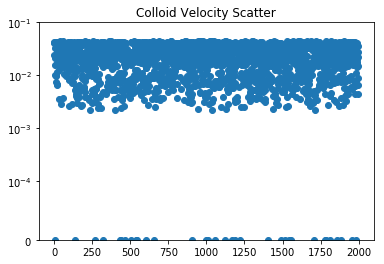

In [7]:
cv.plot()
plt.yscale("Symlog", linthreshy=1e-04)
plt.ylim([-1e-9, 1e-1])
plt.title("Colloid Velocity Scatter")
plt.show()

We can also plot the distribution as a histogram

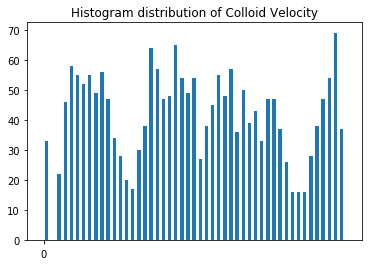

In [8]:
cv.plot_histogram(nbin=50, width=0.0005)
plt.xscale("Symlog", linethreshx=1e-04)
plt.title("Histogram distribution of Colloid Velocity")
plt.show()

## The `ModelPlot` class is another powerful data processing class that allows the user to build plots of output data

Let's instantiate it using the hdf5 object and make a basic plot!

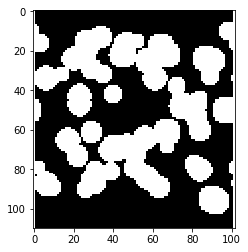

In [9]:
mplot = ColloidOutput.ModelPlot(hdf5)
mplot.plot('image', cmap='gray')

We can also do dimensionalized velocity plots in the X and Y principle directions

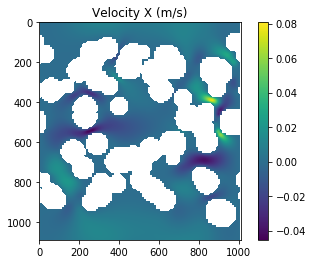

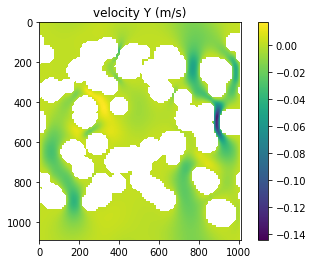

In [10]:
mesh = mplot.plot('velocity_x')
plt.colorbar(mesh)
plt.title("Velocity X (m/s)")
plt.show()

mesh2 = mplot.plot('velocity_y')
plt.colorbar(mesh2)
plt.title("velocity Y (m/s)")
plt.show()

And quiver plots showing velocity magnitude and direction

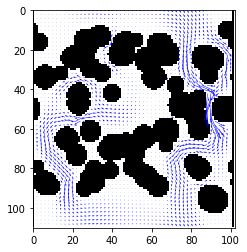

In [11]:
mplot.plot_velocity_magnitude(nbin=2, dimensional=False, masked=True, color="blue")
mplot.plot("image", masked=True, cmap='gray')
plt.show()

that's easy! Now let's make a complex plot using model plot and matplotlib.

We're going to look at a continuous DLVO profile, vs. the discrete model DLVO profile to show the power of this class

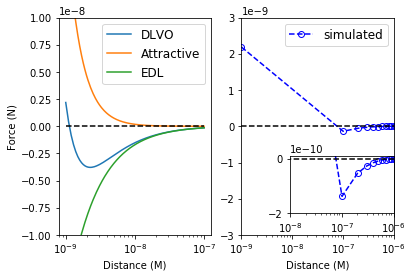

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)

mplot = ColloidOutput.ModelPlot(hdf5)

# Continuous DLVO Profile
ax1 = mplot.plot("dlvo_fine", ax=ax1, label="DLVO")
ax1 = mplot.plot("attractive_fine", ax=ax1, label="Attractive")
ax1 = mplot.plot("edl_fine", ax=ax1, label="EDL")
ax1.plot([1e-09, 1e-07], [0, 0], "k--")
ax1.legend(loc=0, fontsize=12)
ax1.set_ylim([-1e-08, 1e-08])
ax1.set_xscale("log")
ax1.set_ylabel("Force (N)")
ax1.set_xlabel("Distance (M)")

# Discrete DLVO Profile
ax2 = mplot.plot("dlvo_y", ax=ax2, color='b', marker="o", 
                 mfc="None", ls="--", label="simulated")
ax2.legend(loc=0, fontsize=12)
ax2.set_xscale("log")
ax2.set_xlabel("Distance (M)")
ax2.set_xlim([1e-09, 1e-06])
ax2.set_ylim([-3.0e-09, 3.0e-09])
ax2.plot([1e-09, 1e-06], [0, 0], "k--")

# Inset showing the repulsive energy barrier
left, bot, wid, height = [0.66, 0.20, 0.24, 0.2]
ax3 = fig.add_axes([left, bot, wid, height])
ax3 = mplot.plot("dlvo_y", ax=ax3, color='b', marker="o", 
              mfc="None", ls="--")
ax3.set_xscale("log")
ax3.set_ylim([-2e-10, 1e-11])
ax3.set_xlim([1e-08, 1e-06])
ax3.plot([1e-09, 1e-06], [0, 0], "k--")
plt.show()

## Plotting Colloid-Colloid DLVO interactions

Use the `CCModelPlot` object for Colloid-Colloid interactions

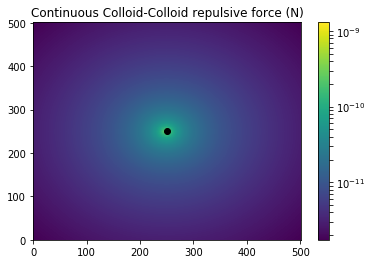

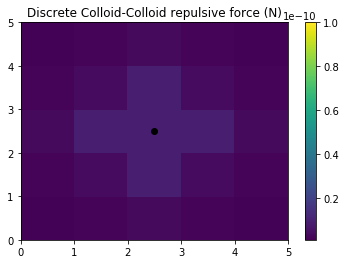

In [13]:
ccmplot = ColloidOutput.CCModelPlot(hdf5)
mesh = ccmplot.plot_mesh("col_col_fine")
plt.colorbar(mesh)
plt.title("Continuous Colloid-Colloid repulsive force (N)")
plt.show()

mesh  = ccmplot.plot_mesh("col_col", vmin=1e-12, vmax=1e-10)
plt.colorbar(mesh)
plt.title("Discrete Colloid-Colloid repulsive force (N)")
plt.show()

## Finally, we can look at the breakthrough profile using `Breakthrough`

This class utilizes the endpoint file for data processing

In [14]:
bt = ColloidOutput.Breakthrough(endpoint)

# create a cumulative continuous breakthrough curve!
bt.breakthrough_curve

,nts
ncol,
1,2478
2,2479
3,2485
4,2488
5,2489
6,2489
7,2489
8,2491
9,2493


We can also plot using the `Breakthrough` object

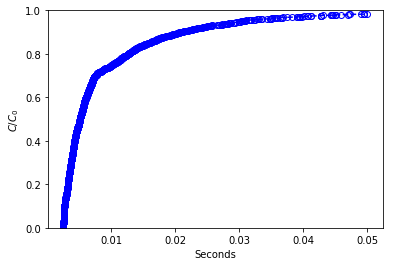

In [15]:
bt.plot(time=True, color='b', marker="o", mfc="None", ls="--")
plt.ylabel(r"$C/C_{0}$")
plt.xlabel("Seconds")
plt.show()

There is much more than can be done with these classes and methods, and I forsee them evolving into a more consice and powerful framework in the future. 

### Happy Data Processing